In [5]:
import pandas as pd

data = {
    'Restaurant': ['Taj Biryani', 'Spicy South', 'Veg Delight', 'Punjabi Tadka', 'Coastal Curry'],
    'City': ['Hyderabad', 'Chennai', 'Delhi', 'Amritsar', 'Vishakhapatnam'],
    'Latitude': [17.385, 13.0827, 28.6139, 31.6340, 17.6868],
    'Longitude': [78.4867, 80.2707, 77.2090, 74.8723, 83.2185],
    'Rating': [4.5, 4.2, 3.8, 4.3, 4.6],
    'Price': [200, 150, 120, 180, 220],
    'Cuisine': ['Indian', 'South Indian', 'North Indian', 'Punjabi', 'Seafood']
}

df = pd.DataFrame(data)
df.head()


,Restaurant,City,Latitude,Longitude,Rating,Price,Cuisine
0,Taj Biryani,Hyderabad,17.3850,78.4867,4.5,200,Indian
1,Spicy South,Chennai,13.0827,80.2707,4.2,150,South Indian
2,Veg Delight,Delhi,28.6139,77.2090,3.8,120,North Indian
3,Punjabi Tadka,Amritsar,31.6340,74.8723,4.3,180,Punjabi
4,Coastal Curry,Vishakhapatnam,17.6868,83.2185,4.6,220,Seafood


In [7]:
!pip install folium



   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [8]:
conda install -c conda-forge folium


Jupyter detected...
Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda





3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\WINDOWS\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.8.1               |     pyhd8ed1ab_0          29 KB  conda-forge
    conda-25.7.0               |  py313hfa70ccb_0         1.2 MB  conda-forge
    folium-0.20.0              |     pyhd8ed1ab_0          81 KB  conda-forge
    openssl-3.1.0              |       hcfcfb64_3         7.1 MB  conda-forge
    ucrt-10.0.26100.0          |       h57928b3_0         678 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.1 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/

In [9]:
from folium.plugins import LocateControl
import folium

# Create map centered on a location
m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Add locate control
LocateControl(auto_start=True).add_to(m)

m



In [10]:
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant']
    ).add_to(m)


In [13]:
import pandas as pd

# If you already have a DataFrame with 'City' column
city_counts = df['City'].value_counts()
print("📍 Restaurants per City:\n", city_counts)


📍 Restaurants per City:
 City
Los Angeles    3
Name: count, dtype: int64


In [14]:
stats = df.groupby('City')[['Rating', 'Price']].mean()
print("📊 City-wise Average Rating & Price:\n", stats)


📊 City-wise Average Rating & Price:
                Rating       Price
City                             
Los Angeles  4.233333  176.666667


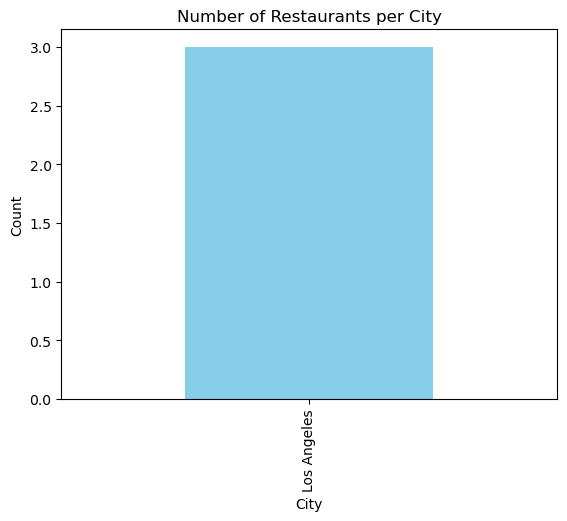

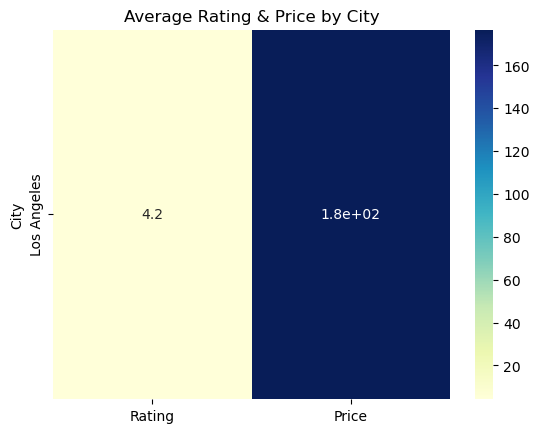

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for restaurant count
city_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Restaurants per City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

# Heatmap for rating and price
sns.heatmap(stats, annot=True, cmap='YlGnBu')
plt.title("Average Rating & Price by City")
plt.show()


In [16]:
top_rated = stats.sort_values('Rating', ascending=False).head(3)
print("🌟 Top Rated Cities:\n", top_rated)

# Top 3 cities with highest average price
top_expensive = stats.sort_values('Price', ascending=False).head(3)
print("💰 Most Expensive Cities:\n", top_expensive)

# Cities with most restaurants
top_density = city_counts.head(3)
print("🏙️ Cities with Most Restaurants:\n", top_density)


🌟 Top Rated Cities:
                Rating       Price
City                             
Los Angeles  4.233333  176.666667
💰 Most Expensive Cities:
                Rating       Price
City                             
Los Angeles  4.233333  176.666667
🏙️ Cities with Most Restaurants:
 City
Los Angeles    3
Name: count, dtype: int64


In [17]:
m.save("restaurant_map.html")
